This notebook contains the code to produce all of the pythia-based plots
For the plots comparing theory results and pythia results, we generate the values for Pythia in this notebook,
write them to files, and then use gnuplots to make the plots.  Previews are given for such plots.  

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas
import importlib
#from toggle_cell import hide_cell 
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)
import root_pandas,glob

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

plt.rcParams['savefig.bbox']='tight'
import misc_util
importlib.reload(misc_util)
import gc

import ROOT
import collections
pdg = ROOT.TDatabasePDG()

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
imagedir="/home/sebouh/Documents/Overleaf_git/CC_DIS_EIC/images/"

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


Welcome to JupyROOT 6.27/01


In [3]:
#produce plots similar to those in NC-DIS paper https://journals.aps.org/prd/pdf/10.1103/PhysRevD.102.074015

In [4]:
#df_all = root_pandas.read_root("../CC_DIS_EIC_1.5M_all.root")
#df_all = root_pandas.read_root("../CC_DIS_EIC_test_10k.root")



In [5]:
df_all = root_pandas.read_root("/data/sebouh/tuples/CC_DIS_275x10_tuples.root")
print(df_all.memory_usage().sum()/1024**3, "GB")
ints = df_all.select_dtypes(include=['int64']).columns.tolist()
df_all[ints] = df_all[ints].astype('int16')
print(df_all.memory_usage().sum()/1024**3, "GB")
import gc
gc.collect()

if not "Hadron_i" in df_all.columns:
    df_all['Hadron_i'] = df_all.eval("Jet_i-Jet_i")
df_jets = df_all.query('(Jet_PT > 0 or GenJet_PT>0) and Hadron_i == 0')
df_rg = df_all.query('Jet_E > 0 and GenJet_E>0 and Hadron_i == 0')
df_nu = df_all.query("Jet_i == 0 and Hadron_i == 0") #just neutrinos.  
df_hadrons = df_all.query("Hadron_P>0 or Hadron_E>0")
print([len(a) for a in (df_all,df_jets,df_rg,df_nu,df_hadrons)])
del df_all
#for col in "Hadron_i Jet_i Neutrino_PID Quark_PID GenJet_NCharged GenJet_NNeutrals Jet_NCharged Jet_NNeutrals".split():
    

7.379040863364935 GB
7.379040863364935 GB
[9978822, 1808365, 1010344, 1500000, 8927091]


In [6]:
df_all = root_pandas.read_root("/data/sebouh/tuples/CC_DIS_positron_275x10_tuples.root")
print(df_all.memory_usage().sum()/1024**3, "GB")
ints = df_all.select_dtypes(include=['int64']).columns.tolist()
df_all[ints] = df_all[ints].astype('int16')
print(df_all.memory_usage().sum()/1024**3, "GB")
import gc
gc.collect()

if not "Hadron_i" in df_all.columns:
    df_all['Hadron_i'] = df_all.eval("Jet_i-Jet_i")
df_jets_pos = df_all.query('(Jet_PT > 0 or GenJet_PT>0) and Hadron_i == 0')
df_rg_pos = df_all.query('Jet_E > 0 and GenJet_E>0 and Hadron_i == 0')
df_nu_pos = df_all.query("Jet_i == 0 and Hadron_i == 0") #just neutrinos.  
df_hadrons_pos = df_all.query("Hadron_P>0 or Hadron_E>0")
print([len(a) for a in (df_all,df_jets,df_rg,df_nu,df_hadrons)])
del df_all

6.488872613757849 GB
6.488872613757849 GB
[9191786, 1808365, 1010344, 1500000, 8927091]


In [7]:
# fig 1 is feynman diagram (not included here)

ycut factor 0.9134708610550385
pythia ycut 1285253.5015044392
2.116314016508132
positron 386929.9268099776
positron 818865.2275144211


Figure 2:  this generates the values to be used by th gnuplot scripts.  A preview is shown


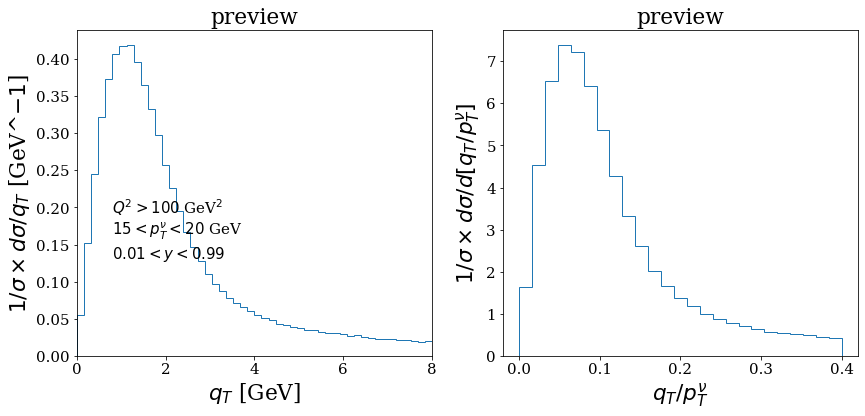

In [31]:
q2min, y_range,pt_range = 100,(.01,.99),(15,20)
zh_range=0.1,0.5
#pt_range=(0, 50)

q = 'Gen_Q2>%s and Gen_y>%s and Gen_y<%s and Neutrino_PT>%s and Neutrino_PT<%s' %(q2min,*y_range,*pt_range)

fig,axs = plt.subplots(1,2, figsize=(14,6))

plt.sca(axs[0])
#plt.hist(df_jets.query(q).eval(Gen),bins =20,density=True,histtype='step',range=(0.05,1))
y, x, _ = plt.hist(df_jets.query(q).eval("Gen_qT"),bins =50,density=True,histtype='step',range=(0,8))
#y, x, _ = plt.hist(df_hadrons.query(q+" and GenJet_PT>10").GenHadron_Zh,bins =20,density=True,histtype='step',range=(0.05,1))
plt.gca().set_xlim(0,8)
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
with open("../gnuplot/fig2_qToverpTnu/data/pythia_qt.dat", "w") as f:
    f.write("0.0 0.0\n")
    for i in range(len(x)-1):
        f.write(f"{x[i]} {y[i]}\n")
        f.write(f"{x[i+1]} {y[i]}")
        if i != len(x)-2:
            f.write("\n")
txt = "$Q^2>%s$ GeV$^2$\n$%s<p^{\\nu}_T<%s$ GeV\n$%s<y<%s$"%(q2min,*pt_range,*y_range)
plt.text(0.1,0.3,txt,transform=plt.gca().transAxes)



plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/q_T$ [GeV^$-1$]")
plt.gca().set_xlabel("$q_T$ [GeV]")

#q+= f" and Hadron_Zh>{zh_range[0]} and Hadron_Zh<{zh_range[1]}"
plt.sca(axs[1])
axs[0].set_title("preview")
axs[1].set_title("preview")
y, x, _ =plt.hist(df_jets.query(q).eval("Gen_qT/Neutrino_PT"),bins =25,density='true',histtype='step',range=(0,0.4))
#y, x, _ =plt.hist(df_hadrons.query(q+" and GenJet_PT>10").GenHadron_Jt,bins =50,density='true',histtype='step',range=(0,2))
#plt.text(0.5,0.4,txt + f"\n{zh_range[0]}<$z_h$<{zh_range[1]}",transform=plt.gca().transAxes)
plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/d[q_T/p^\\nu_T]$")
plt.gca().set_xlabel("$q_T/p^\\nu_T$")
#plt.savefig(f"{imagedir}/zh_and_jt.png")
plt.show()
with open("../gnuplot/fig2_qToverpTnu/data/pythia_ratio.dat", "w") as f:
    f.write("0.0 0.0\n")
    for i in range(len(x)-1):
        f.write(f"{x[i]} {y[i]}\n")
        f.write(f"{x[i+1]} {y[i]}")
        if i != len(x)-2:
            f.write("\n")

 Figure 3:  This generates the values to be used by the gnuplot scripts.  A preview of is shown.
 To generate the plots as they appear in the paper (whihc includes Fanyi's calculations):
  gnuplot/fig3_zh_and_jt; gnuplot gnuplot_jt.x; gnuplot gnuplot_zh.x

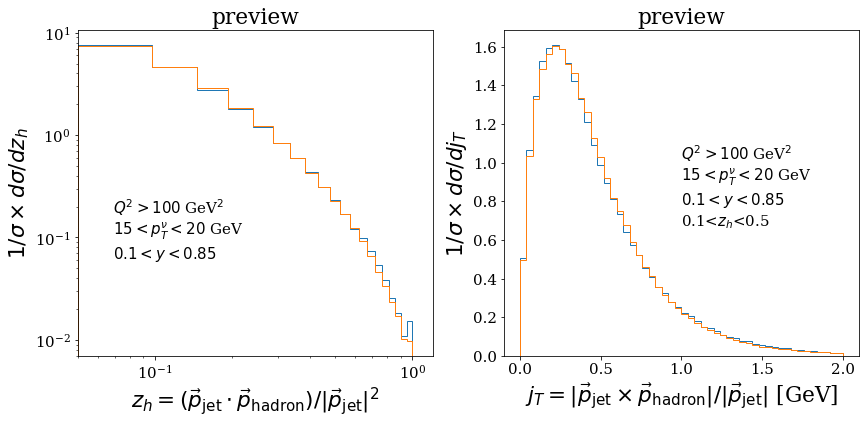

In [20]:
q2min, y_range,pt_range = 100,(.1,.85),(15,20)
zh_range=0.1,0.5

q = 'Gen_Q2>%s and Gen_y>%s and Gen_y<%s and Neutrino_PT>%s and Neutrino_PT<%s and abs(GenHadron_PID)==211' %(q2min,*y_range,*pt_range)

fig,axs = plt.subplots(1,2, figsize=(14,6))

plt.sca(axs[0])
plt.hist(df_hadrons.query(q).Hadron_Zh,bins =20,density=True,histtype='step',range=(0.05,1))
y, x, _ = plt.hist(df_hadrons.query(q).GenHadron_Zh,bins =20,density=True,histtype='step',range=(0.05,1))
#y, x, _ = plt.hist(df_hadrons.query(q+" and GenJet_PT>10").GenHadron_Zh,bins =20,density=True,histtype='step',range=(0.05,1))
plt.gca().set_xlim(0.05,1.2)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
with open("../gnuplot/fig3_zh_and_jt/data/zh_pythia_pipm.dat", "w") as f:
    
    for i in range(len(x)-1):
        f.write(f"{x[i]} {y[i]}\n")
        f.write(f"{x[i+1]} {y[i]}")
        if i != len(x)-2:
            f.write("\n")
txt = "$Q^2>%s$ GeV$^2$\n$%s<p^{\\nu}_T<%s$ GeV\n$%s<y<%s$"%(q2min,*pt_range,*y_range)
plt.text(0.1,0.3,txt,transform=plt.gca().transAxes)


#hack_legend(labels='Recon. Gen.'.split())

plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/dz_h$")
plt.gca().set_xlabel("$z_h = (\\vec p_{\\mathrm{jet}}\\cdot\\vec p_{\\mathrm{hadron}})/|\\vec p_{\\mathrm{jet}}|^2$")

q+= f" and Hadron_Zh>{zh_range[0]} and Hadron_Zh<{zh_range[1]}"
plt.sca(axs[1])
plt.hist(df_hadrons.query(q).Hadron_Jt,bins =50,density='true',histtype='step',range=(0,2),label='Recon')
y, x, _ =plt.hist(df_hadrons.query(q).GenHadron_Jt,bins =50,density='true',histtype='step',range=(0,2))
#y, x, _ =plt.hist(df_hadrons.query(q+" and GenJet_PT>10").GenHadron_Jt,bins =50,density='true',histtype='step',range=(0,2))
plt.text(0.5,0.4,txt + f"\n{zh_range[0]}<$z_h$<{zh_range[1]}",transform=plt.gca().transAxes)
axs[0].set_title("preview")
axs[1].set_title("preview")
plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/dj_T$")
plt.gca().set_xlabel("$j_T = |\\vec p_{\\mathrm{jet}}\\times\\vec p_{\\mathrm{hadron}}|/|\\vec p_{\\mathrm{jet}}|$ [GeV]")
#hack_legend(labels='Recon. Gen.'.split())
#plt.savefig(f"{imagedir}/zh_and_jt.png")
plt.show()
with open("../gnuplot/fig3_zh_and_jt/data/jt_pythia_pipm.dat", "w") as f:
    f.write("0.0 0.0\n")
    for i in range(len(x)-1):
        f.write(f"{x[i]} {y[i]}\n")
        f.write(f"{x[i+1]} {y[i]}")
        if i != len(x)-2:
            f.write("\n")

ycut factor 0.9134708610550385
pythia ycut 1285253.5015044392
2.116314016508132
positron 386929.9268099776
positron 818865.2275144211
neutrinos:
x,dx,y,dy,n
11.5,1.5,147471.36666666664,151.207730548996,205774
14.5,1.5,151864.53333333333,153.4434387287019,211904
17.5,1.5,144323.76666666666,149.5853528183083,201382
21.5,2.5,121108.20999999999,106.14084981758909,281647
27.0,3.0,77525.05833333332,77.52221903715376,216349
33.5,3.5,31565.378571428573,45.79702334146594,102771
42.0,5.0,4685.71,14.76279106402309,21794


jets:
x,dx,y,dy,n
11.5,1.5,160504.66666666666,157.74804101618645,223960
14.5,1.5,155452.16666666666,155.24532556927798,216910
17.5,1.5,141707.93333333335,148.22355488323112,197732
21.5,2.5,114370.97,103.14630386009961,265979
27.0,3.0,70784.80833333332,74.07559952132986,197539
33.5,3.5,27927.885714285716,43.07752858959942,90928
42.0,5.0,3935.575,13.529597185430172,18305


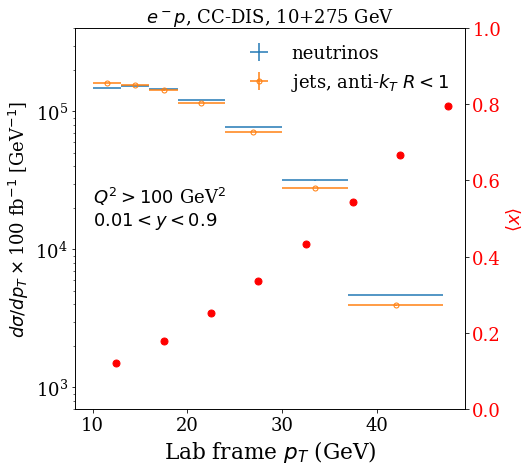

neutrinos:
x,dx,y,dy,n
11.5,1.5,227280.8,187.71609769365367,317136
14.5,1.5,187268.58333333334,170.3933358112602,261305
17.5,1.5,146830.66666666666,150.87890655901654,204880
21.5,2.5,97990.55,95.4746039530932,227885
27.0,3.0,46742.433333333334,60.19505332205001,130444
33.5,3.5,13380.67857142857,29.817471935981782,43565
42.0,5.0,1354.07,7.935993951610598,6298


jets:
x,dx,y,dy,n
11.5,1.5,224165.44999999998,186.42514136600064,312789
14.5,1.5,180483.9,167.27821137255145,251838
17.5,1.5,137897.41666666666,146.21711406139994,192415
21.5,2.5,89540.18999999999,91.26510833829103,208233
27.0,3.0,41330.525,56.60315067791427,115341
33.5,3.5,11507.721428571429,27.651991846180348,37467
42.0,5.0,1119.075,7.214568594171102,5205


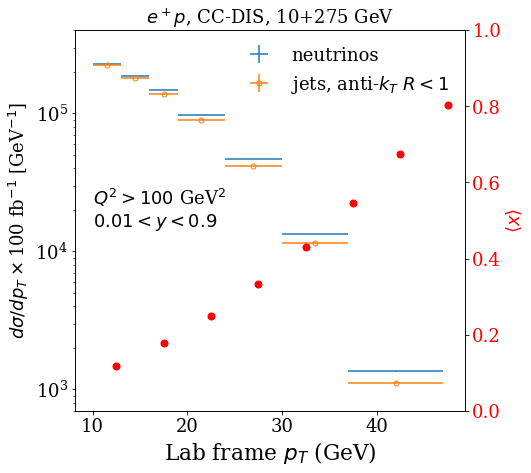

In [34]:
# fig4.  Also creates another plot for positrons (not included in paper)

Pythia_no_ycut_exp=1.407e6
Pythia_ycut_factor=len(df_nu.query("Gen_Q2>100 and Gen_y>0.01 and Gen_y<0.9"))/len(df_nu.query("Gen_Q2>100"))
print("ycut factor", Pythia_ycut_factor)
print("pythia ycut", Pythia_no_ycut_exp*Pythia_ycut_factor)
NLO=2.72e6
scale_Pythia_to_NLO=NLO/(Pythia_no_ycut_exp*Pythia_ycut_factor)
print(scale_Pythia_to_NLO)

print("positron", 0.406e6*len(df_nu_pos.query("Gen_Q2>100 and Gen_y>0.01 and Gen_y<0.9"))/len(df_nu_pos.query("Gen_Q2>100")))
print("positron", scale_Pythia_to_NLO*0.406e6*len(df_nu_pos.query("Gen_Q2>100 and Gen_y>0.01 and Gen_y<0.9"))/len(df_nu_pos.query("Gen_Q2>100")))





scale_xs=2.15 #factor to account for the difference in total cross-sections for NLO vs Pythia
from io import StringIO
for df_nu_i, df_jets_i, tag,lbl in (df_nu, df_jets, "e-", '$e^-p$'), (df_nu_pos, df_jets_pos, "e+", '$e^+p$'):
    s="""x,y
    5.00,0.02
    6.85,0.03
    9.34,0.05
    12.71,0.10
    17.29,0.17
    23.55,0.28
    32.15,0.43
    43.80,0.62"""
    NC_pt_x = pd.read_csv(StringIO(s))
    s="""x,y
    5.96,172760479.70
    8.05,62682393.51
    11.02,21656031.51
    15.04,7486742.06
    20.42,2124968.13
    27.89,396440.17
    38.01,28914.34"""
    NC_pt_sige = pd.read_csv(StringIO(s))



    useGenJets=1
    useStdErrorOnMean=1

    partitions = [10,13, 16,19, 24, 30, 37,47]
    xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]

    fig,ax = plt.subplots(1,1, figsize=(7,7),sharex='all')

    plt.sca(ax)
    ngen = len(df_nu)
    lumi = ngen/1.5e6
    q2min, ymax, ymin = 100, .9, .01
    q = f"Gen_Q2 >{q2min} and Gen_y < {ymax} and Gen_y > {ymin}"
    xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]
    print("neutrinos:\nx,dx,y,dy,n")
    for i in range(len(partitions)-1):
        df = df_nu_i.query(q + " and Neutrino_PT>%s and Neutrino_PT<%s" %tuple(partitions[i:i+2]))
        x = (partitions[i]+partitions[i+1])/2
        dx = (partitions[i+1]-partitions[i])/2
        n = len(df)
        y = n/(lumi*2*dx)*scale_xs
        dy = np.sqrt(n)/(lumi*2*dx)
        print(x,dx,y,dy,n,sep=',')
        xs.append(x)
        dxs.append(dx)
        y1s.append(y)
        dy1s.append(dy)
        del df
    plt.errorbar(xs,y1s,dy1s,dxs,linestyle='',label='neutrinos')


    for useGenJets in True,:
        print("\n\njets:\nx,dx,y,dy,n")
        xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]
        for i in range(len(partitions)-1):
            if useGenJets:
                df = df_jets_i.query(q+" and GenJet_PT>%s and GenJet_PT<%s" %tuple(partitions[i:i+2]))
            else :
                df = df_jets_i.query(q+" and Jet_PT>%s and Jet_PT<%s" %tuple(partitions[i:i+2]))
            x = (partitions[i]+partitions[i+1])/2
            dx = (partitions[i+1]-partitions[i])/2
            n = len(df)
            y = n/(lumi*2*dx)*scale_xs
            dy = np.sqrt(n)/(lumi*2*dx)
            print(x,dx,y,dy,n,sep=',')
            xs.append(x)
            dxs.append(dx)
            y1s.append(y)
            dy1s.append(dy)
            #y1s.append(np.mean(df.))
            #dy1s.append(dy)
            del df
        plt.errorbar(xs,y1s,dy1s,dxs,linestyle='',label='jets, anti-$k_T$ $R<1$',marker='o',markersize=5,fillstyle='none')
    plt.gca().set_yscale("log")

    plt.legend(loc='upper right',framealpha=0, fontsize='large')
    ax2 = ax.twinx()
    plt.sca(ax2)
    partitions = np.arange(10,55,5)
    xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]
    for i in range(len(partitions)-1):
        df = df_nu_i.query(q + " and Neutrino_PT>%s and Neutrino_PT<%s" %tuple(partitions[i:i+2]))
        x = (partitions[i]+partitions[i+1])/2
        dx = (partitions[i+1]-partitions[i])/2

        a = df.eval("Gen_x")
        y = np.mean(a)
        dy = np.std(a)
        if useStdErrorOnMean:
            dy/=np.sqrt(len(df))
        #w = df.eval("1/Q2")
        #dy = np.sqrt(np.average((a-np.average(a,weights=w))**2, weights=w))
        xs.append(x)
        dxs.append(dx)
        y1s.append(y)
        dy1s.append(dy)

        del df
        #y2s.append(np.mean(a[a<y+dy*2]))
        #dy2s.append(np.std(a[a<y+dy*2]))
    plt.errorbar(xs,y1s,dy1s,linestyle='',color='r',marker='o',markersize=7)

    #plt.errorbar(xs,y2s,dy2s,dxs,linestyle='',color='b')
    ax.set_xlabel("Lab frame $p_T$ (GeV)")

    ax.set_ylabel("$d\\sigma/dp_T \\times$100 fb$^{-1}$ [GeV$^{-1}$]",fontsize='large')
    ax.set_title(f"{lbl}, CC-DIS, 10+275 GeV",fontsize='large')
    ax.tick_params(labelsize='large')
    ax.text(10, 1.5e4, f"$Q^2>{q2min}$ GeV$^2$\n${ymin}<y<{ymax}$", fontsize='large')
    
    #ax.set_ylim(1e3,1e5)
    ax.set_ylim(0.7e3,4e5)

    ax2.set_ylabel("$\\langle x\\rangle$",fontsize='large',color='r')
    ax2.tick_params(labelcolor='r', labelsize='large')
    ax2.set_ylim(0,1)

    
    
    overlay_NC = False
    if overlay_NC:
        plt.errorbar(NC_pt_x.x,NC_pt_x.y,linestyle='',color='b',marker='o',markersize=7)

        #ax.errorbar(NC_pt_sige.x,NC_pt_sige.y,linestyle='',color='g',marker='s',markersize=5)
    plt.savefig(imagedir+f"/cross_sections_and_xbar_{tag}.png")
    plt.savefig(imagedir+f"/cross_sections_and_xbar_{tag}.pdf")
    plt.show()

### Figure 5 is from a Delphes event display (not included in this notebook)

### Figure 6

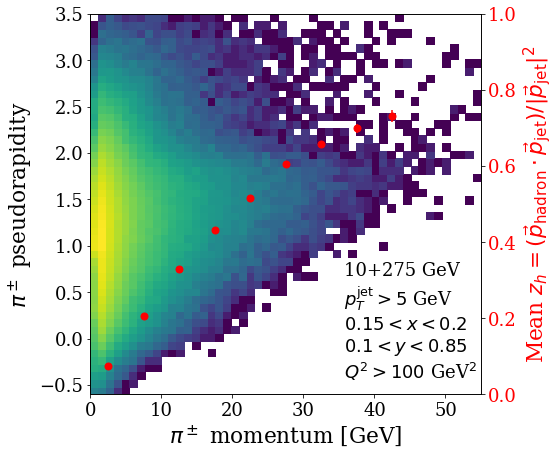

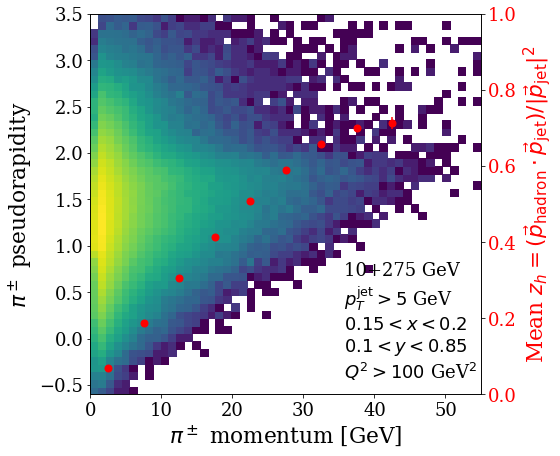

In [23]:
import matplotlib as mpl
for df_hadrons_i,  tag in (df_hadrons, "e-"), (df_hadrons_pos, "e+"):
    jetptmin = 5
    q2min = 100
    xmin,xmax = .15,.20
    ymin,ymax = .1,.85
    fig,ax = plt.subplots(1,1,figsize=(7,7),sharex='all')
    df = df_hadrons_i.query(f"Gen_Q2>{q2min} and Jet_PT>{jetptmin} and Gen_x>{xmin} and "
                          f" Gen_x<{xmax} and Gen_y>{ymin} and Gen_y<{ymax} and abs(Hadron_PID)==211")

    plt.sca(ax)
    h2d = plt.hist2d(df.Hadron_P,df.Hadron_Eta, 
                   bins=50, norm=mpl.colors.LogNorm(),range=((0,55),(-.6,3.5)))
    h2d[-1].set_edgecolor('face')
    plt.text(0.65,0.04,"10+275 GeV\n$p_T^{\\mathrm{jet}}>"+str(jetptmin)+\
             "$ GeV\n$"+str(xmin)+"<x<" + str(xmax) + "$\n$" + str(ymin) + "<y<"+str(ymax)+"$\n$Q^2>" + str(q2min)+"$ GeV$^2$",
             transform=plt.gca().transAxes,fontsize='large')

    plt.gca().set_xlabel("$\\pi^\\pm$ momentum [GeV]")
    plt.gca().set_ylabel("$\\pi^\\pm$ pseudorapidity")
    
    ax.tick_params(labelsize='large')
    
    ax2 = ax.twinx()
    plt.sca(ax2)
    ax2.set_ylim(0,1)

    ax2.set_ylabel(\
        "Mean $z_h = (\\vec p_{\\mathrm{hadron}}\\cdot\\vec p_{\\mathrm{jet}})/|\\vec p_{\\mathrm{jet}}|^2$",
                   color='r')
    ax2.tick_params(labelcolor='r',labelsize='large')

    partitions = np.arange(0,50,5)
    x = []
    y = []
    dy = []
    for i in range(len(partitions[:-1])):
        dfs = df.query(f"Hadron_P>{partitions[i]} and  Hadron_P<{partitions[i+1]}")
        x.append((partitions[i]+partitions[i+1])/2)
        y.append(np.mean(dfs.Hadron_Zh))
        dy.append(np.std(dfs.Hadron_Zh)/np.sqrt(len(dfs)))
        del dfs
    plt.errorbar(x,y,dy,color='r',marker='o',linestyle ='',markersize=7)
    plt.savefig(imagedir+f"/hadron_momentum_pseudorapidity_and_zh_{tag}.png",bbox_inches='tight')
    plt.savefig(imagedir+f"/hadron_momentum_pseudorapidity_and_zh_{tag}.pdf",bbox_inches='tight')
    plt.show()

For figures 7 and 8, which show the resolutions of the recon, use a variation of the input files with a different gen/recon matching algorithm

In [47]:

df_all=root_pandas.read_root("/data/sebouh/tuples/CC_DIS_275x10_tuples_highestEnergy.root")
df_jets_recon = df_all.query('(Jet_PT > 0 or GenJet_PT>0) and Hadron_i == 0')
del df_all

[12.693309145356537, 10.233141783299596, 8.544441118557707, 7.187049138825626, 6.097231853762762, 5.589934909881309] [0.061483688645509064, 0.0464095324643334, 0.03679806250016581, 0.02998857724513809, 0.02505724199414323, 0.020948042142735646]


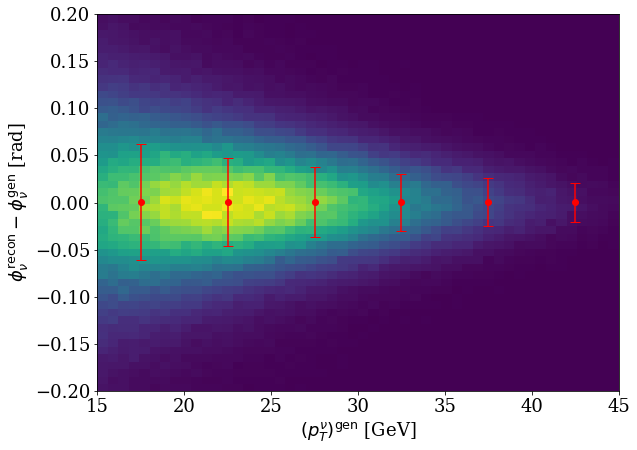

In [49]:
#Figure 7
fig, axs = plt.subplots(1,1, figsize=(7*1.3, 5*1.3))
partitions = np.linspace(15,45, 7)
df = df_rg.query("Gen_Q2>100 and Gen_y>0.1 and Gen_y<0.85 and Neutrino_PT>15 and GenJet_PT>10")

#plt.sca(axs[1])
plt.xlabel("$(p^{\\nu}_T)^{\\rm gen}$ [GeV]", fontsize='large')
plt.ylabel("$\\phi^{\\rm recon}_\\nu-\\phi^{\\rm gen}_\\nu$ [rad]", fontsize='large')
axs.tick_params(labelsize='large')

df.eval(f"NuDphi=JB_Phi-arctan2(Neutrino_Py,Neutrino_Px)-{np.pi}",inplace=True)
df.eval(f"NuDphi=NuDphi+(NuDphi<-{np.pi})*{2*np.pi}", inplace=True)
h2d= plt.hist2d(df.eval("Neutrino_PT"), df.eval("NuDphi"),bins=50, range=((15,45), (-.2,.2)))#, norm = mpl.colors.LogNorm())
h2d[-1].set_edgecolor('face')
x,y1, dy1, y2,dy2=[],[],[],[],[]
for i in range(len(partitions)-1):
    x.append((partitions[i]+partitions[i+1])/2)
    df_slice=df.query(f"Neutrino_PT>{partitions[i]} and Neutrino_PT<{partitions[i+1]}")
    a = df_slice.eval("(JB_MET-Neutrino_PT)/Neutrino_PT*100")
    y1.append(np.mean(a[(a>a.quantile(0.03))&(a<a.quantile(0.97))]))
    dy1.append(np.std(a[(a>a.quantile(0.03))&(a<a.quantile(0.97))]))
    
    a = df_slice.eval("NuDphi")
    y2.append(np.mean(a[(a>a.quantile(0.03))&(a<a.quantile(0.97))]))
    dy2.append(np.std(a[(a>a.quantile(0.03))&(a<a.quantile(0.97))]))
    del df_slice
print(dy1, dy2)
#axs[0].errorbar(x,y1,dy1,color='r', linestyle='', marker='o',capsize=5)
plt.errorbar(x,y2,dy2,color='r', linestyle='', marker='o',capsize=5)
plt.tight_layout()

plt.savefig(imagedir+"/phi_nu_res.pdf",dpi=300)

In [54]:
def purity_plot(df, expr,genExpr,partitions,**kwarg):
    xs = []
    ys = []
    dys = []
    dxs = []
    for i in range(len(partitions)-1):
        x=(partitions[i]+partitions[i+1])/2
        dx = (partitions[i+1]-partitions[i])/2
        num = len(df.query(f"{expr}>={partitions[i]} and {expr}<{partitions[i+1]} and {genExpr}>={partitions[i]} and {genExpr}<{partitions[i+1]}"))
        denom = len(df.query(f"{expr}>={partitions[i]} and {expr}<{partitions[i+1]}"))
        if denom == 0:
            continue
        y =num/denom
        dy = np.sqrt(((denom-num)*num)/denom**3)
        
        xs.append(x)
        ys.append(y)
        dys.append(dy)
        dxs.append(dx)
    print(ys)
    plt.errorbar(xs,ys,dys,dxs,**kwarg)

In [55]:
def hack_legend(labels = 'Pythia;theory'.split(';'),*varg,**kwarg):
    #create a legend with lines instead of boxes
    handle1 = matplotlib.lines.Line2D([], [], c='tab:blue')
    handle2 = matplotlib.lines.Line2D([], [], c='tab:orange')
    plt.legend(handles=[handle1, handle2],labels=labels,framealpha=0,**kwarg)

In [61]:
def fig8(q2min=100, y_range=(0,1),
         nupt_range=(0,50),jetpt_range=(0,50),partitions = [0,1,2,3.5,5.5,8,10.5],
         expr_recon="qT",expr_gen='Gen_qT',ylbl="$1/\\sigma\\times d\\sigma/dq_T$",xlbl="$q_T$ [GeV]"):
    q = f'Gen_Q2>{q2min} and Gen_y>{y_range[0]} and Gen_y<{y_range[1]} and GenMissingET_MET>{nupt_range[0]} and GenJet_PT>{jetpt_range[0]} '
    if nupt_range[1] is not None:
        q += f" and GenMissingET_MET<{nupt_range[1]}"
    if jetpt_range[1] is not None:
        q += f" and GenJet_PT<{jetpt_range[1]}"
        
    df = df_jets_recon.query(q + " and Jet_PT>0 and GenJet_PT>0 and qT>0")
    scale=1.17
    fig,axs = plt.subplots(3,1, figsize=(7*scale,14*scale),sharex='all', gridspec_kw=dict(height_ratios=[7, 4,3]))
    fig.subplots_adjust(hspace=0.075)
    
    plt.sca(axs[0])
    h2d=plt.hist2d(df.eval(expr_gen),df.eval(expr_recon), bins=100, range=[(partitions[0],partitions[-1])]*2, norm=mpl.colors.LogNorm())
    h2d[-1].set_edgecolor('face')
    plt.gca().set_ylabel(f"{xlbl} recon",fontsize='large')
    
    
    axs[0].tick_params(bottom=True,direction='inout')
    axs[1].tick_params(top=True,direction='inout')
    
    for a in axs:
        a.tick_params(labelsize='large')
    
    plt.sca(axs[1])
    plt.hist(df.eval(expr_recon),density=True,histtype='step',bins=partitions)

    plt.hist(df.eval(expr_gen),density=True,histtype='step',bins=partitions)
    #plt.gca().set_xlim(0.05,1.2)

    txt = f"$Q^2>{q2min}$ GeV$^2$\n"
    if nupt_range[1] is not None:
        txt += f"${nuput_range[0]}<p^{{\\nu}}_T<{nupt_range[1]}$ GeV\n"
    else:
        txt += f"$p^{{\\nu}}_T>{nupt_range[0]}$ GeV\n"
    if jetpt_range[1] is not None:
        txt += f"${jetpt_range[0]}<p^{{\\mathrm{{jet}}}}_T < {jetpt_range[0]}$ GeV\n"
    else :
        txt += f"$p^{{\\mathrm{{jet}}}}_T > {jetpt_range[0]}$ GeV\n"
    txt += "$%s<y<%s$" % y_range
    
    #txt = "$Q^2>%s$ GeV$^2$\n$%s<p^{\\nu}_T<%s$ GeV\n$%s<p^{\\mathrm{jet}}_T<%s$ GeV\n$%s<y<%s$"%(q2min,*nupt_range,*jetpt_range,*y_range)
    txt+= "\n$\\langle Q^2\\rangle$=%.0f GeV$^2$\n$\\langle x_B \\rangle$=%.2f" %(np.mean(df.Gen_Q2),np.mean(df.Gen_x))
    plt.text(0.6,0.2,txt,transform=plt.gca().transAxes,fontsize='large')

    hack_legend(loc = (0.25,.7),labels='Recon. Gen.'.split(), fontsize='large')
    plt.gca().set_ylabel(ylbl,fontsize='large')
    #plt.gca().set_xlabel(xlbl)


    #ax2 = axs[1].twinx()
    #ax2.tick_params(labelcolor='r')
    
    plt.sca(axs[2])
    purity_plot(df,expr_recon,expr_gen,partitions,color='r',marker='o',linestyle='')
    plt.gca().set_xlabel(xlbl,fontsize='large')
    plt.gca().set_ylabel("purity",fontsize='large')   
    plt.gca().set_ylim(0, 1)

[0.5089062600115333, 0.5054315900223576, 0.5374689214457435, 0.538458126330731, 0.5361211141324318]


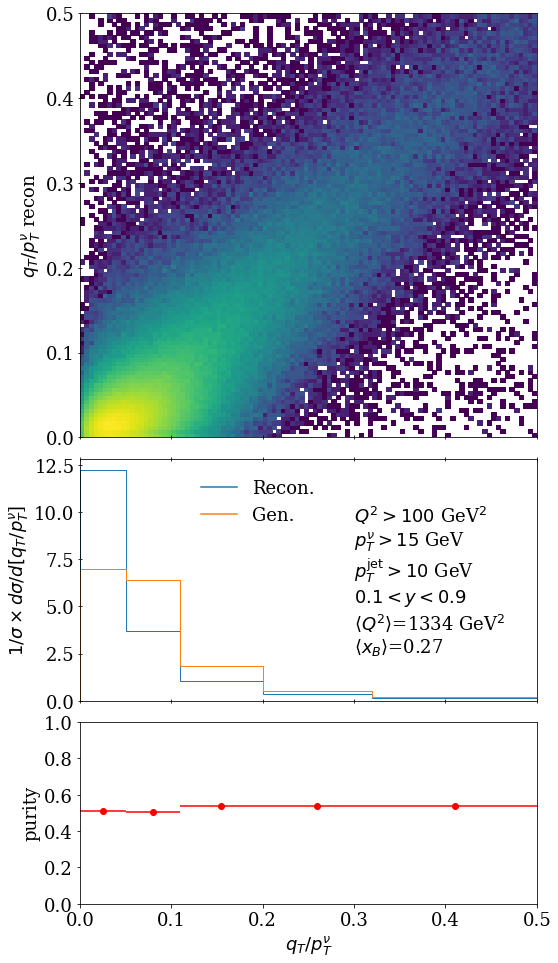

In [62]:

fig8(jetpt_range=(10,None),nupt_range=(15,None), y_range=(0.1,0.9),
     #partitions = [0,.07,.17,.4],
     partitions = [0,.05,.11,.20,.32,.5],
     expr_recon='qT/JB_MET',expr_gen='Gen_qT/GenMissingET_MET',
     ylbl="$1/\\sigma\\times d\\sigma/d[q_T/p^\\nu_T$]",xlbl="$q_T/p^\\nu_T$")

plt.savefig(imagedir+"/qToverpTnu.pdf")

Produce values for Figure 9, which are written to a file, which is used in the gnuplots to generate the "official" plot
 the plots shown here are are a preview in matplotlib.  

In [41]:
Pythia_no_ycut_exp=1.407e6
Pythia_ycut_factor=len(df_nu.query("Gen_Q2>100 and Gen_y>0.01 and Gen_y<0.9"))/len(df_nu.query("Gen_Q2>100"))
print("ycut factor", Pythia_ycut_factor)
print("pythia ycut", Pythia_no_ycut_exp*Pythia_ycut_factor)
NLO=2.72e6
scale_Pythia_to_NLO=NLO/(Pythia_no_ycut_exp*Pythia_ycut_factor)
print(scale_Pythia_to_NLO)

print("positron", 0.406e6*len(df_nu_pos.query("Gen_Q2>100 and Gen_y>0.01 and Gen_y<0.9"))/len(df_nu_pos.query("Gen_Q2>100")))
print("positron", scale_Pythia_to_NLO*0.406e6*len(df_nu_pos.query("Gen_Q2>100 and Gen_y>0.01 and Gen_y<0.9"))/len(df_nu_pos.query("Gen_Q2>100")))



ycut factor 0.9134708610550385
pythia ycut 1285253.5015044392
2.116314016508132
positron 386929.9268099776
positron 818865.2275144211


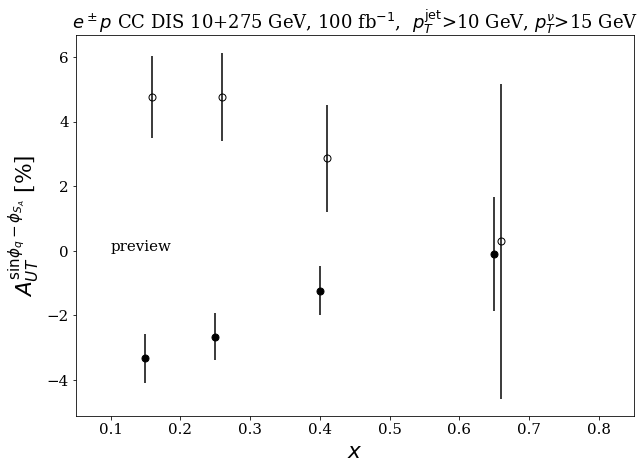

In [42]:
#figure 9
tags='$e^-p$',"$e^+p$"
names="electron positron".split()
plt.subplots(1,1, figsize=(10,7))


fillstyles='full', 'none'
for i, df_jets_i, df_nu_i,nexp in (0, df_jets, df_nu, 1.407e6), (1, df_jets_pos, df_nu_pos, 0.406e6):
    
    df = df_jets_i.query("Jet_PT>10 and qT/JB_MET>0.03 and qT<5 and MissingET_MET>15 and Gen_Q2>100 and JB_y>0.01 and JB_y <0.9")
    
    partitions=[0.1, 0.2, 0.3, 0.5, 0.8]
    x = []

    if i == 0:
        y = [-3.33, -2.66, -1.23, -.1] #from Fanyi's plot
    if i == 1:
        y = [4.76, 4.77, 2.86, 0.29] #from Fanyi's plot
        
    
    dy = []
    dx = []        
    for j in range(len(partitions)-1):
        n = len(df.query(f"Gen_x>{partitions[j]} and Gen_x<{partitions[j+1]}"))
        n*=nexp/len(df_nu_i.query("Gen_Q2>100"))
        n*=scale_Pythia_to_NLO
        xmid=(partitions[j]+partitions[j+1])/2
        if n>0:
            x.append(xmid)
            dx.append((partitions[j+1]-partitions[j])/2)
            #y.append(0)#arbitrary value...
            dy.append(100*np.sqrt(2)/(.7*np.sqrt(n)))
    x=pd.Series(x)
    with open(f"../gnuplot/fig9_sivers/gnuplot/stats_{names[i]}.dat", "w") as f:
        f.write("#mean x in bin, AUT from Fanyi's plot, stat error from Sebouh's simulation\n")
        for k in range(len(x)):
            f.write("%.3f %.3f %.3f"%(x[k], y[k], dy[k]))
            if k != len(x)-1:
                f.write("\n")
    plt.errorbar(x+i*.2*(dx[0]),y,dy, linestyle='', marker='o', color='k', label=tags[i], fillstyle=fillstyles[i], markersize=7)
    #plt.axhline(0,color='0.5',alpha=0.7, linestyle='--')
    plt.gca().set_ylabel("$A_{UT}^{{\\rm sin} \\phi_{q}-\\phi_{S_A}}$ [%]")
    plt.gca().set_xlabel("$x$")
    plt.gca().set_xlim(0.05, 0.85)
    #plt.gca().set_ylim(0, 0.04)
    
    #q2min, y_range,pt_range = 100,(.1,.85),(15,20)
    plt.gca().set_title(r"$e^\pm p$ CC DIS 10+275 GeV, 100 fb$^{-1}$,  $p^{\rm jet}_T$>10 GeV, $p^{\nu}_T$>15 GeV",
                       fontsize='large')
plt.gca().text(0.1, 0, "preview")
plt.savefig(imagedir+"/x_vs_AUT.png")

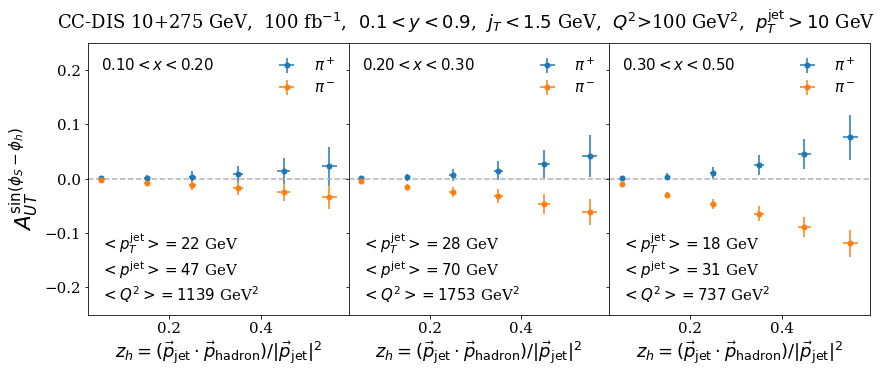

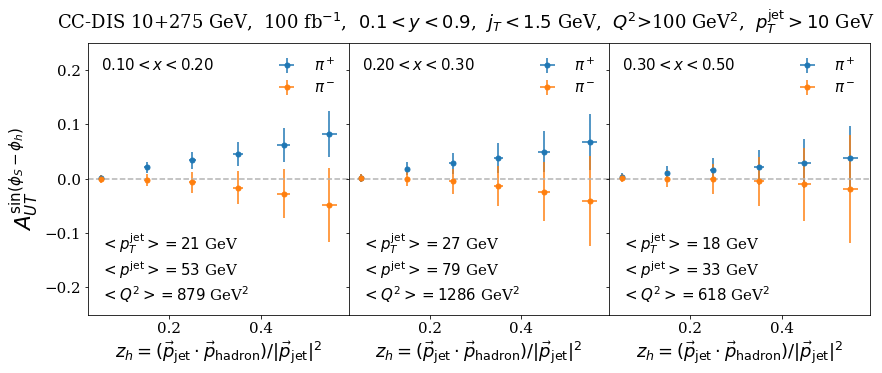

In [46]:
# Figure 10 (write values to text files, to be used in a gnuplot.)  Preview is shown.
jetptmin = 10
jtmax = 1.5
q2min = 100
ymin,ymax = .1,.9


#from Fanyi's plot
ys={"e-":{211:{0:[0.000722,0.000722,0.0036,0.00794,0.0137,0.0224],
              1:[0.00086, 0.0027, 0.0074, 0.0149, 0.0269, 0.0417],
              2:[0.00072, 0.0036, 0.0108, 0.0253, 0.0455, 0.0758]},
         -211:{0:[-0.00217, -0.00794, -0.0123, -0.0181, -0.0252, -0.0339],
               1:[-0.0049, -0.0147, -0.0244, -0.0327, -0.0467, -0.0623],
               2:[-0.0094, -0.0297, -0.0469, -0.0643, -0.0888, -0.1191]}
        },
   "e+":{211:{0:[0.00079,0.0209,0.0339,0.0455,0.0614,0.0816],
              1:[0.00079, 0.0181, 0.0281, 0.0383, 0.0498, 0.0671],
              2:[0.0037, 0.0099, 0.0160, 0.0207, 0.0283, 0.0373]},
         -211:{0:[-0.00072, -0.0022, -0.0065, -0.0166, -0.0282, -0.0483],
               1:[0.00072, -0.00072, -0.0051, -0.0137, -0.0238, -0.0412],
               2:[0.0009, -0.0002, -0.0013, -0.0053, -0.0107, -0.0190]}
        }
  }

for nexp, df_hadrons_i, df_nu_i, tag in (1.407e6, df_hadrons, df_nu, "e-"),(0.406e6, df_hadrons_pos, df_nu_pos, "e+"): 
    fig,axs = plt.subplots(1,3,figsize=(14,5),sharey='all')

    fig.suptitle("CC-DIS 10+275 GeV,  100 fb$^{-1}$,  $%s<y<%s$,  $j_T<%s$ GeV,  $Q^2$>%s GeV$^2$,  $p_T^{\\mathrm{jet}}>%s$ GeV"%(ymin,ymax,jtmax,q2min,jetptmin),fontsize='large')
    fig.subplots_adjust(wspace=0)
    xranges = (.1,.2),(.2,.3),(.3,.5)

    partitions = np.linspace(0,0.6,7)

    for i in range(len(xranges)):
        xmin,xmax = xranges[i]
        df = df_hadrons_i.query(f"Gen_Q2>{q2min} and Jet_PT>{jetptmin} and Gen_x>{xmin} and Gen_x<{xmax} and Gen_y>{ymin}"+\
                                f" and Gen_y<{ymax} and abs(Hadron_PID)==211 and Hadron_Jt<{jtmax}"+\
                               f" and Neutrino_PT>15 and qT<5")
        #print(len(df))
        ptmean,pmean,q2mean = [np.mean(df[a]) for a in ['Jet_PT','Jet_P','Gen_Q2']]
        txt = "$<p^{\\mathrm{jet}}_T> = %.0f$ GeV\n$<p^{\\mathrm{jet}}> = %.0f$ GeV\n$<Q^2> = %.0f$ GeV$^2$"%(ptmean,pmean,q2mean)
        plt.text(0.05,0.05,txt,transform=plt.gca().transAxes)

        for pid in 211,-211:
            plt.sca(axs[i])
            x = []
            y = []
            dy = []
            dx = []
            for j in range(len(partitions)-1):
                n = len(df.query(f"Hadron_PID=={pid} and Hadron_Zh>{partitions[j]} and Hadron_Zh<{partitions[j+1]}"))*nexp/len(df_nu_i)
                
                n*=scale_Pythia_to_NLO
                xmid=(partitions[j]+partitions[j+1])/2
                x.append(xmid)
                dx.append(.03*xmid)
                y.append(ys[tag][pid][i][j])
                dy.append(np.sqrt(2)/(.7*np.sqrt(n)))
            plt.errorbar(x,y,dy,dx,marker='o',linestyle='',markersize=5,label='$\\pi^%s$'%('+' if pid>0 else '-'))
            with open(f"../gnuplot/fig10_collins/stats/{pid}_{tag}_p{i}.dat", "w") as f:
                for k in range(len(x)):
                    f.write(f"{x[k]} {y[k]} {dy[k]}")
                    f.write("\n")
                    
        plt.gca().set_ylim(-.25,.25)

        txt = "$%.2f<x<%.2f$"%(xmin,xmax)
        plt.text(0.05,0.9,txt,transform=plt.gca().transAxes)
        plt.axhline(0,color='0.7',linestyle='--')
        plt.legend(loc='upper right',framealpha=0)
        plt.gca().set_xlabel("$z_h = (\\vec p_{\\mathrm{jet}}\\cdot\\vec p_{\\mathrm{hadron}})/|\\vec p_{\\mathrm{jet}}|^2$",fontsize='large')
    axs[0].set_ylabel("$A^{\\sin(\\phi_S-\\phi_h)}_{UT}$")
    plt.show()
#plt.savefig(imagedir+"/")